# 18BCE101
## Practical 2
### Aim: 
Instead of single document you hve to create minimum five TEXT documents and then apply preprocessing steps to form a vocabulary and represent using boolean approach

# Phase 1 : Build corpus

In [2]:
for i in range(5):
    name = input("Enter the file name: ")
    f = open(name+".txt", "a")
    content = input("Enter the content: ")
    f.write(content)
    f.close()

Enter the file name: doc1
Enter the content: Well! he huffed and he puffed. He puffed and he huffed. And he huffed, huffed, and he puffed, puffed; but he could not blow the house down. At last, he was so out of breath that he couldn't huff and he couldn't puff anymore. So he stopped to rest and thought a bit. But this was too much. The wolf danced about with rage and swore he would come down the chimney and eat up the little pig for his supper. But while he was climbing on to the roof the little pig made up a blazing fire and put on a big pot full of water to boil. Then, just as the wolf was coming down the chimney, the little piggy pulled off the lid, and plop! in fell the wolf into the scalding water.
Enter the file name: doc2
Enter the content: In the sentence above, we can see that there are two "can" words, but both of them have different meanings. Here the first "can" word is used for question formation. The second "can" word at the end of the sentence is used to represent a cont

# Phase 2 : Preprocess the corpus documents individually and come up with a joint vocabulary

In [1]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
# For stopword removal
nltk.download('stopwords')
# For tokenization
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\labdh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\labdh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
stop_word = set(stopwords.words('english'))
 
# Print complete list of stop words dictionary of NLTK
stop_word

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [3]:
def tokenization(doc):
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(doc)
    return words

In [4]:
def stopWord(words):
    aftersw = []
    for l in words:
        if l not in stop_word:
            aftersw.append(l)
            
    return aftersw

In [5]:
def stemming(aftersw):
    ps = PorterStemmer()
    stemwords = []
    
    for a in aftersw:
        stemwords.append(ps.stem(a))
        
    return stemwords

In [6]:
def caseConversion(stemwords):
    lowerWords = []
    for w in stemwords:
        lowerWords.append(w.lower())
    return lowerWords

In [7]:
vocab = []

In [8]:
def addvocab(lowerWords):
    global vocab
    vocab.append(lowerWords)

In [9]:
for i in range(1,6):
    f = open("doc"+str(i)+".txt", "r")
    doc = f.read()
    
    print("For doc",i)
    words = tokenization(doc)
    print("After word tokenization\n",words)

    aftersw = stopWord(words)
    print("\nAfter stop words removal\n",aftersw)

    stemwords = stemming(aftersw)
    print("\nAfter stemming\n",stemwords)

    lowerWords = caseConversion(stemwords)
    print("\nAfter case conversion\n",lowerWords)
    
    addvocab(lowerWords)
    
    #wordFreq(lowerWords, i)
    wordList = set(lowerWords)
    print("\nThe vocabulary for that document is\n",wordList)
    print("\n---------------------------------------------------------------------------------------------------------------\n")

    f.close()

For doc 1
After word tokenization
 ['Well', 'he', 'huffed', 'and', 'he', 'puffed', 'He', 'puffed', 'and', 'he', 'huffed', 'And', 'he', 'huffed', 'huffed', 'and', 'he', 'puffed', 'puffed', 'but', 'he', 'could', 'not', 'blow', 'the', 'house', 'down', 'At', 'last', 'he', 'was', 'so', 'out', 'of', 'breath', 'that', 'he', 'couldnt', 'huff', 'and', 'he', 'couldnt', 'puff', 'anymore', 'So', 'he', 'stopped', 'to', 'rest', 'and', 'thought', 'a', 'bit', 'But', 'this', 'was', 'too', 'much', 'The', 'wolf', 'danced', 'about', 'with', 'rage', 'and', 'swore', 'he', 'would', 'come', 'down', 'the', 'chimney', 'and', 'eat', 'up', 'the', 'little', 'pig', 'for', 'his', 'supper', 'But', 'while', 'he', 'was', 'climbing', 'on', 'to', 'the', 'roof', 'the', 'little', 'pig', 'made', 'up', 'a', 'blazing', 'fire', 'and', 'put', 'on', 'a', 'big', 'pot', 'full', 'of', 'water', 'to', 'boil', 'Then', 'just', 'as', 'the', 'wolf', 'was', 'coming', 'down', 'the', 'chimney', 'the', 'little', 'piggy', 'pulled', 'off', 'th

In [10]:
print(vocab)

[['well', 'huf', 'puf', 'he', 'puf', 'huf', 'and', 'huf', 'huf', 'puf', 'puf', 'could', 'blow', 'hous', 'at', 'last', 'breath', 'couldnt', 'huff', 'couldnt', 'puff', 'anymor', 'so', 'stop', 'rest', 'thought', 'bit', 'but', 'much', 'the', 'wolf', 'danc', 'rage', 'swore', 'would', 'come', 'chimney', 'eat', 'littl', 'pig', 'supper', 'but', 'climb', 'roof', 'littl', 'pig', 'made', 'blaze', 'fire', 'put', 'big', 'pot', 'full', 'water', 'boil', 'then', 'wolf', 'come', 'chimney', 'littl', 'piggi', 'pull', 'lid', 'plop', 'fell', 'wolf', 'scald', 'water'], ['in', 'sentenc', 'see', 'two', 'word', 'differ', 'mean', 'here', 'first', 'word', 'use', 'question', 'format', 'the', 'second', 'word', 'end', 'sentenc', 'use', 'repres', 'contain', 'hold', 'food', 'liquid', 'henc', 'exampl', 'see', 'languag', 'process', 'determinist', 'languag', 'interpret', 'someth', 'suitabl', 'one', 'person', 'might', 'suitabl', 'anoth', 'therefor', 'natur', 'languag', 'process', 'nlp', 'nondeterminist', 'approach', 'in'

In [11]:
wordList = []
for l in vocab:
    l = set(l)
    w = list(l)
    s = " "
    wordList.append(s.join(w))
    
print(wordList)

['water bit he huff chimney puf well lid puff come made boil fire full big supper pull plop stop couldnt much anymor thought would blow the put at hous but so climb rest piggi pig fell and then wolf huf littl rage blaze pot danc last could eat roof swore scald breath', 'henc someth see hold person might anoth human first one food situat new intellig end the determinist process repres use here suitabl nlp question two sentenc in contain liquid approach format nondeterminist system interpret languag creat therefor natur second exampl understand word differ mean', 'howev effort success task machin after common much train death tri deriv learn requir model outcom coffe for deduct process use peopl skin nlp along data hot sens amount take algorithm temperatur posit manual time it lead conclus larg freez burn instanc reason statist', 'bit didnt he mother harder first play sang food togeth work seek stick onc want the fortun built hous sent so somewhat rest world pig lazi feed then upon littl

# Phase 3: Document Term matrix using Boolean model

In [12]:
vec = CountVectorizer()
X = vec.fit_transform(wordList)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [13]:
print(df.shape)
df

(5, 194)


,after,air,algorithm,almost,along,amount,and,anoth,anymor,appetit,...,upon,use,want,water,well,wolf,word,work,world,would
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,1,1,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
4,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1


# Phase 4: Represent term frequencies matrix

In [14]:
wordList = []
for l in vocab:
    s = " "
    wordList.append(s.join(l))
    
print(wordList)

['well huf puf he puf huf and huf huf puf puf could blow hous at last breath couldnt huff couldnt puff anymor so stop rest thought bit but much the wolf danc rage swore would come chimney eat littl pig supper but climb roof littl pig made blaze fire put big pot full water boil then wolf come chimney littl piggi pull lid plop fell wolf scald water', 'in sentenc see two word differ mean here first word use question format the second word end sentenc use repres contain hold food liquid henc exampl see languag process determinist languag interpret someth suitabl one person might suitabl anoth therefor natur languag process nlp nondeterminist approach in word natur languag process use creat new intellig system understand human understand interpret languag differ situat', 'it use common sens reason process task for instanc freez temperatur lead death hot coffe burn peopl skin along common sens reason task howev process take much time requir manual effort it use larg amount data tri deriv con

In [15]:
vec = CountVectorizer()
X = vec.fit_transform(wordList)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df.shape)

(5, 194)


In [16]:
df

,after,air,algorithm,almost,along,amount,and,anoth,anymor,appetit,...,upon,use,want,water,well,wolf,word,work,world,would
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,2,1,3,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,3,0,0,0,0,4,0,0,0
2,1,0,1,0,1,2,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,2,1,0
4,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,5,0,1,0,2


# Phase 5: Visulization

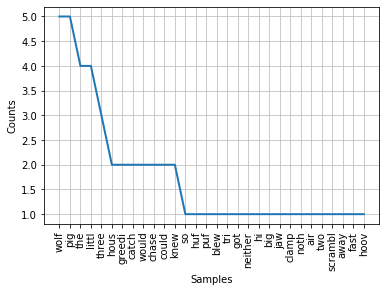

In [46]:
#term frequency plot

for w in wordList:
    fdist = FreqDist(w.split())
fdist.plot(30)

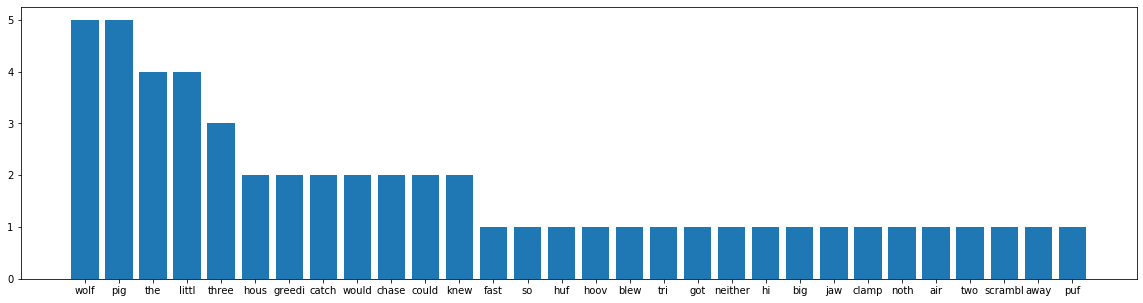

In [47]:
counts = dict(fdist.most_common(30))

labels, values = zip(*counts.items())

# sorting values in descending order
indSort = np.argsort(values)[::-1]

# rearranging data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

plt.figure(figsize=(20,5))

plt.bar(indexes, values)

# add labels
plt.xticks(indexes, labels)
plt.show()

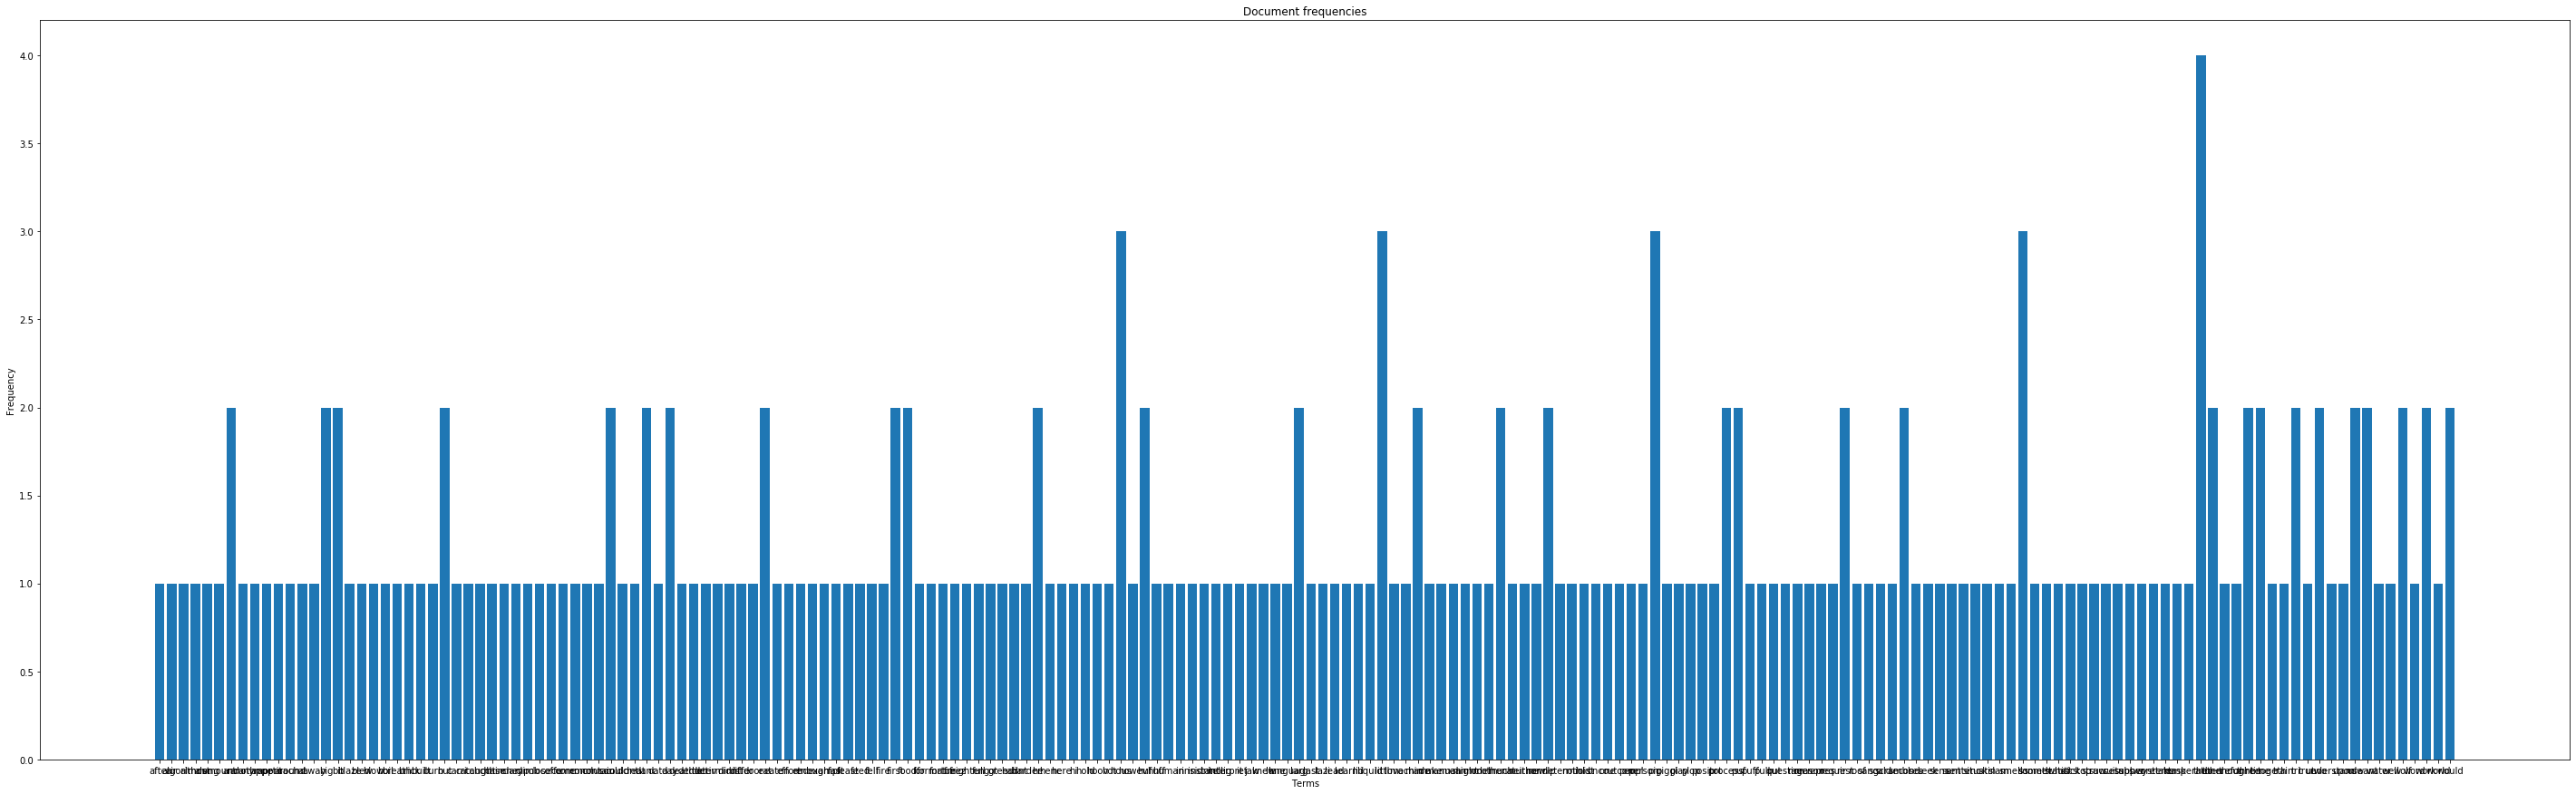

In [48]:
#document frequency plot

datafre = {}

for i in df:
    count = 0;
    for j in df[i]:
        if j != 0:
            count += 1
    datafre.update({i:count})
    
labels, values = zip(*datafre.items())

indexes = np.arange(len(labels))

plt.figure(figsize=(50,15))
plt.title("Document frequencies")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.bar(labels, values)

# add labels
plt.xticks(indexes, labels)
plt.show()

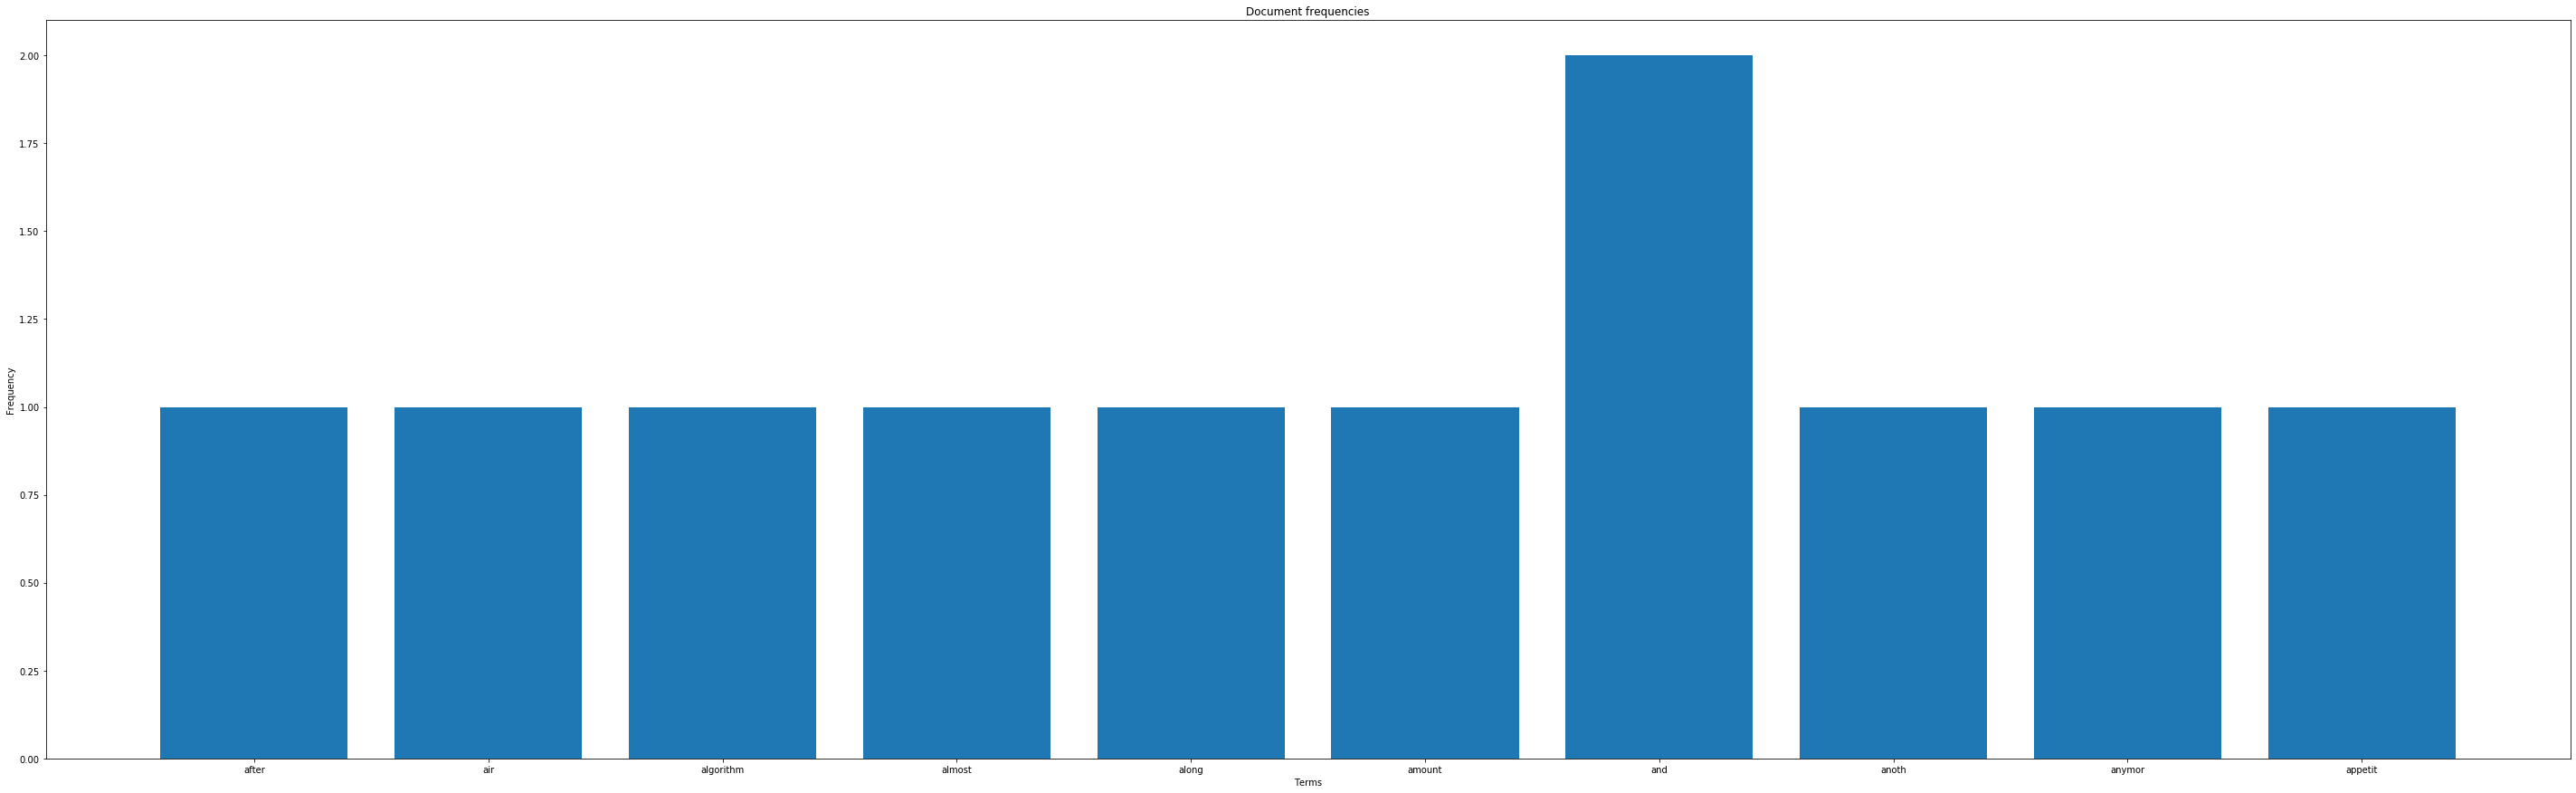

In [49]:
indexes = np.arange(len(labels[:10]))

plt.figure(figsize=(50,15))
plt.title("Document frequencies")
plt.xlabel("Terms")
plt.ylabel("Frequency")

plt.bar(labels[:10], values[:10])

# add labels
plt.xticks(indexes, labels[:10])
plt.show()

# Phase 6: WordCloud

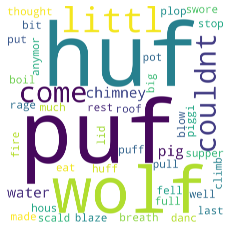

In [23]:
wordcloud = WordCloud(background_color='white',max_words=500,height=5000,width=5000).generate(wordList[0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
if 'you' in stop_word:
    print('y')

y
